In [164]:
import pandas as pd
from tqdm import tqdm
import os
from src.sentiment_analysis import SentimentAnalysis
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
file_path = "data/sampled_dataset_01percent.jsonl"
file_path_climate = "data/climate_videos_v3.jsonl"

df = pd.read_json(file_path, lines=True)
df_climate = pd.read_json(file_path_climate, lines=True)

df.set_index('display_id', inplace=True)
df_climate.set_index('display_id', inplace=True)

In [166]:
file_name = 'data/sample01_title_sentiment_analysis.csv'
file_name_climate = 'data/video_title_sentiment_analysis.csv'

def save_new_title_sentiments(sentiment_res: pd.DataFrame):
    if not os.path.isfile(file_name):
        sentiment_res.to_csv(file_name)
    else:
        old_data = pd.read_csv(file_name, index_col=0)
        new_data = pd.concat([old_data, sentiment_res])
        new_data.to_csv(file_name)

# Perform sentiment analysis on titles

In [167]:
# sa = SentimentAnalysis()
# sentiment_res = pd.DataFrame(columns=sa.sentiment_names)
# 
# batch_size = 200
# last_iter = 0
# for i in tqdm(range(last_iter * batch_size, len(titles), batch_size), desc='Sentiment Analysis'):
#     batch = titles.iloc[i:i+batch_size]
#     sentiment_res[sa.sentiment_names] = batch.apply(sa.get_scores).apply(pd.Series)
#     save_new_title_sentiments(sentiment_res)
#     sentiment_res = pd.DataFrame(columns=sa.sentiment_names)    

# Create new sentiment results

In [168]:
sa_label_to_int = {'positive':1, 'negative':-1, 'neutral':0}

def load_sentiment_data(file_name):
    sentiment_res = pd.read_csv(file_name, index_col=0)
    sentiment_res['sa_label'] = sentiment_res.apply(lambda row: row.idxmax(), axis=1)
    sentiment_res['sa_label_int'] = sentiment_res['sa_label'].apply(lambda l: sa_label_to_int[l])
    sentiment_res['sa_score'] = 0.5 + sum([sentiment_res[label] * sa_label_to_int[label] for label in SentimentAnalysis.sentiment_names]) / 2
    return sentiment_res

sentiment = load_sentiment_data(file_name)
sentiment_climate = load_sentiment_data(file_name_climate)

In [169]:
sa_names = SentimentAnalysis.sentiment_names

data = df.merge(sentiment, left_index=True, right_index=True)
data_climate = df_climate.merge(sentiment_climate, left_index=True, right_index=True)
data.reset_index(inplace=True)
data_climate.reset_index(inplace=True)
data

,display_id,categories,channel_id,crawl_date,description,dislike_count,duration,like_count,tags,title,upload_date,view_count,positive,neutral,negative,sa_label,sa_label_int,sa_score
0,HNg8_Zzz5A8,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:19:30.784552,Lego City Police Lego Fireman Firetruck Cartoo...,31.0,1539,114.0,"Lego city police,lego police,lego city,lego fi...",Lego City Police Lego Fireman Firetruck Cartoo...,2016-08-19 00:00:00,167221,0.465457,0.525257,0.009286,neutral,0,0.728086
1,iBZB5iRIam0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,2019-10-31 20:18:33.167675,Lego Batman Movie Complete Lego Batman 3 Beyon...,0.0,1349,13.0,"lego batman,lego batman movie,lego movies for ...",Lego Batman Movie Complete Lego Batman Beyond ...,2017-12-13 00:00:00,618,0.265168,0.725068,0.009764,neutral,0,0.627702
2,hg2PBUFKOm0,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:51.284693,The best attacking movesets for a dragonite at...,33.0,387,268.0,"pokemon go,pokemongo,pokemon go guide,pokemon ...",THE BEST MOVESETS FOR ATTACKING DRAGONITE :: P...,2016-09-25 00:00:00,17884,0.781337,0.214546,0.004116,positive,1,0.888611
3,g3PBKnHI3wU,Gaming,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:41:49.462458,FREE DIAMONDS AND GEMS HERE!\nStep by Step Gui...,7.0,133,236.0,"Boom Beach,shock mine,boom beach shock mine,bo...",SHOCK MINE SNEAK PEEK #1 | Boom Beach | NEW UP...,2015-10-18 00:00:00,6936,0.062351,0.916810,0.020839,neutral,0,0.520756
4,xt73H3DOTdw,People & Blogs,UCzWfqsjlvzAOUozsGFR3kbg,2019-10-31 15:42:16.064520,Congratz to MineModerzz for giving the Link an...,1.0,187,43.0,"Contest,Speed,Subscriber,Epic,Knights and drag...",Knights and dragons Super Fast Sub Wins the co...,2014-02-19 00:00:00,1644,0.639771,0.354803,0.005425,positive,1,0.817173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72597,Xugl29-oWrI,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:40:23.331322,हमारे देश में लोगों की सेवा करते-करते 33 हजार ...,1.0,139,20.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",हमने दिल्ली में शानदार पुलिस मेमोरियल बनाकर खड...,2019-04-26 00:00:00,344,0.031319,0.824362,0.144319,neutral,0,0.443500
72598,XiufyoFvpSI,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:36.529667,35 हजार शहीद जवानों का सच्चा सम्मान हमारे पीएम...,0.0,112,51.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",मोदी जी ने पहले ही सत्र में 370 और 35A को निरस...,2019-09-30 00:00:00,892,0.030509,0.839562,0.129929,neutral,0,0.450290
72599,1ybxsD_FSC8,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:45.442106,झारखंड की नई पहचान बनने जा रही है कि ये वो राज...,0.0,196,16.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",झारखंड की नई पहचान 'गरीब और आदिवासियों के हितो...,2019-09-12 00:00:00,322,0.033411,0.803885,0.162704,neutral,0,0.435353
72600,A-XkA-FNf2Y,News & Politics,UCrwE8kVqtIUVUzKui2WVpuQ,2019-11-01 23:38:41.144156,Subscribe Now - http://bit.ly/2ofH4S4 Stay Upd...,19.0,1468,550.0,"BJP,Bharatiya Janata Party,Narendra Modi,Amit ...",PM Modi & Russian President Vladimir Putin at ...,2019-09-04 00:00:00,11657,0.049777,0.917450,0.032773,neutral,0,0.508502


 # Remove the gaming category

In [171]:
data = data[~data['categories'].isin(['Gaming', ''])]
data_climate = data_climate[~data_climate['categories'].isin(['Gaming', ''])]

# PLot the sentiment counts and scores

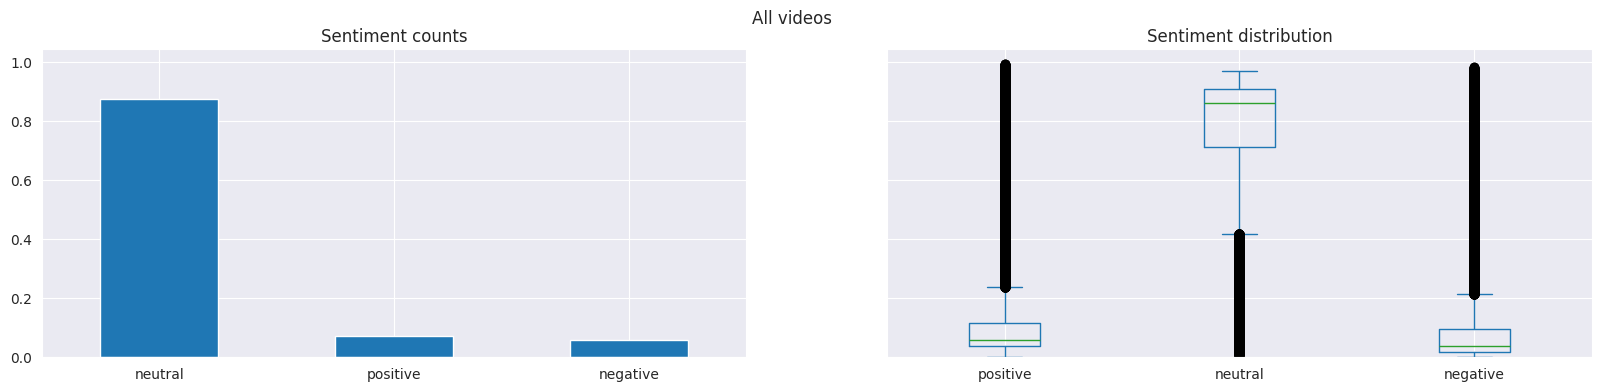

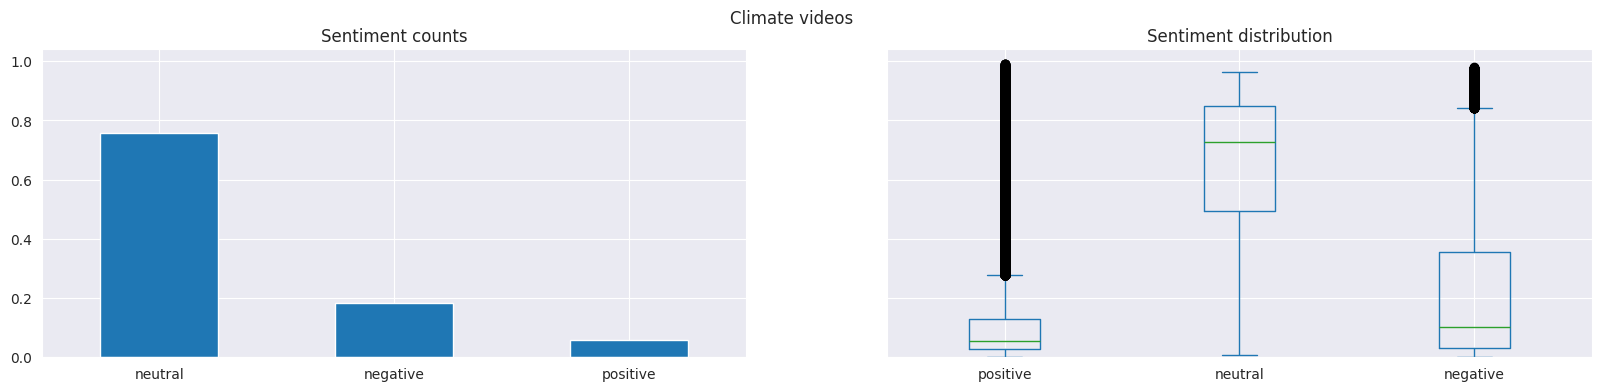

Climate videos seem to be les neutral and more negative then the usual videos


In [181]:
def plot_label_counts(data, label, title):
    fig, ax = plt.subplots(1, 2, figsize=(20, 4), sharey=True)
    fig.suptitle(title)
    data[label].value_counts(normalize=True).plot(kind='bar', ax=ax[0], title='Sentiment counts', rot=0, xlabel="", )
    data[sa_names].plot(kind='box', ax=ax[1], title='Sentiment distribution', rot=0, ylabel="Sentiment score")
    plt.show()


plot_label_counts(data, 'sa_label', 'All videos')
plot_label_counts(data_climate, 'sa_label', 'Climate videos')
print("Climate videos seem to be les neutral and more negative then the usual videos")

/tmp/ipykernel_135373/1067736903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['count'] = 1
/tmp/ipykernel_135373/1067736903.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipykernel_135373/1067736903.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


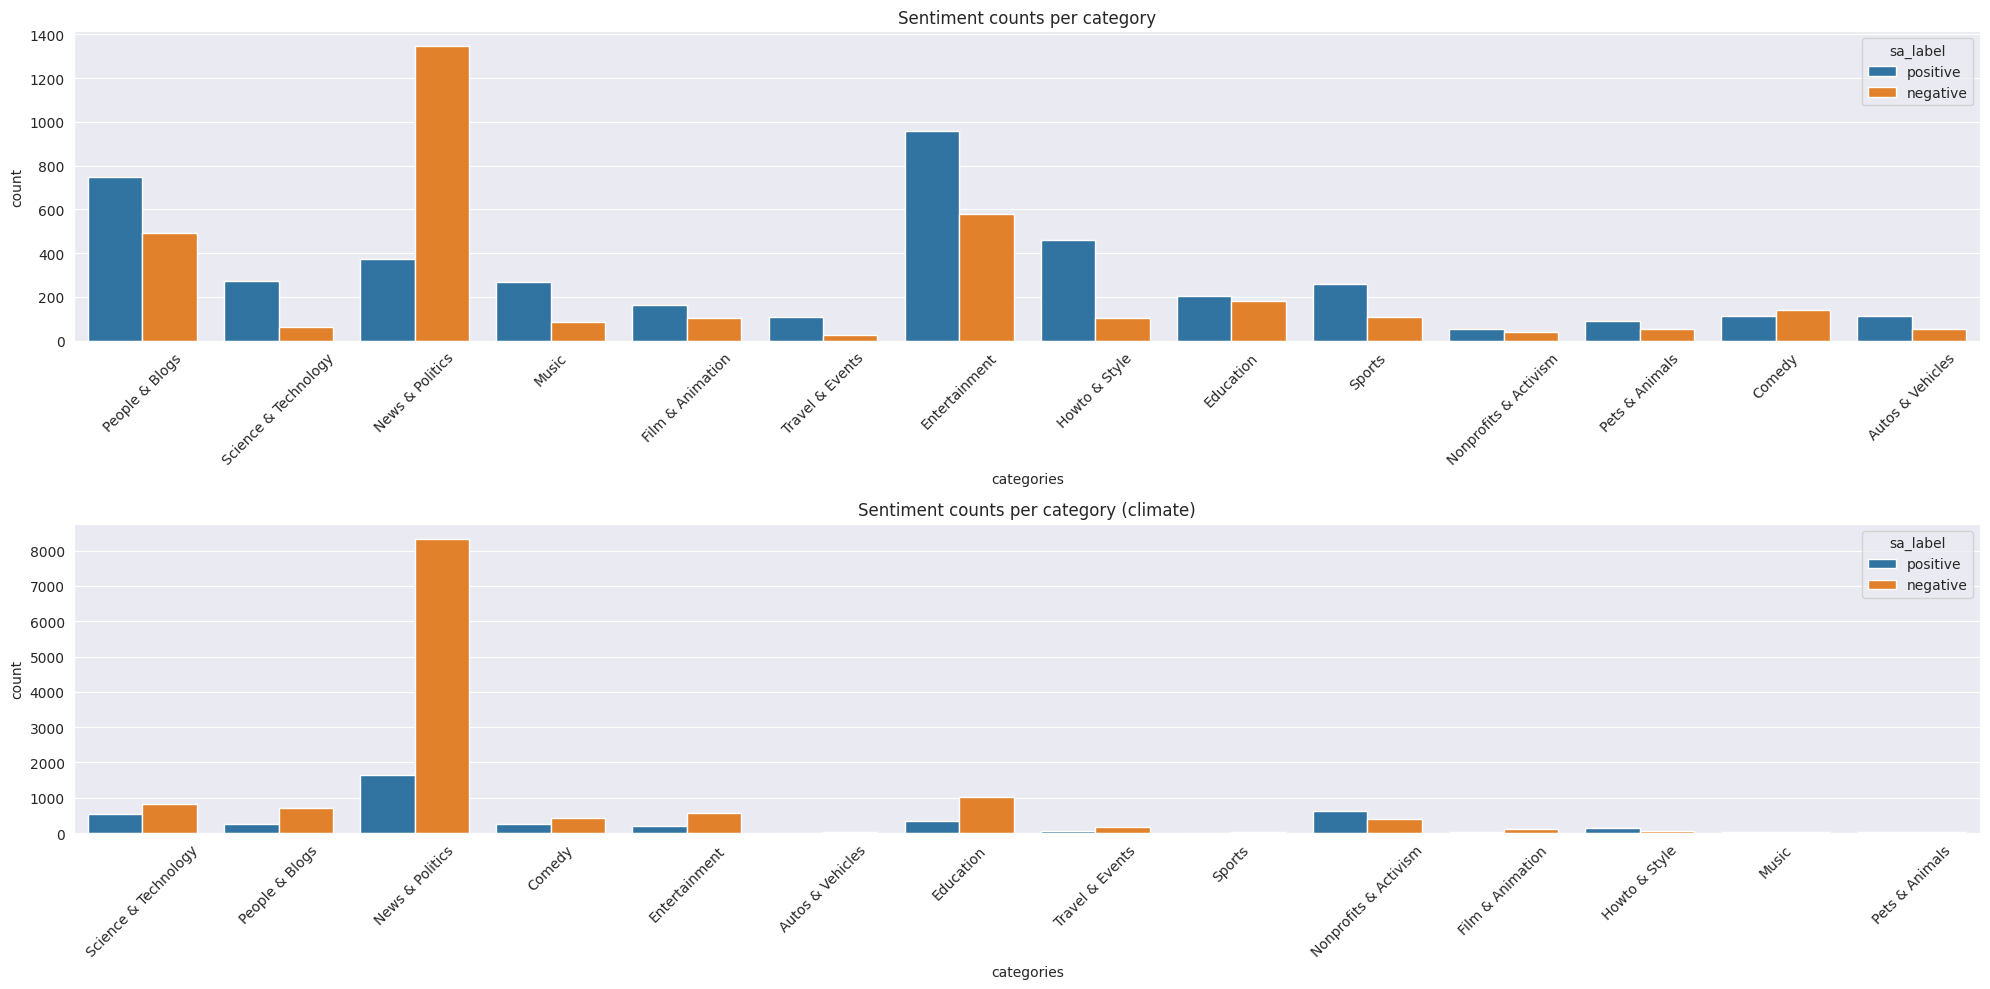

In [240]:
fig, ax = plt.subplots(2, figsize=(20, 10))
data['count'] = 1
sns.barplot(x="categories", y="count", data=data[data['sa_label'] !=  'neutral'], hue="sa_label", ax=ax[0], estimator=sum)
ax[0].set_title("Sentiment counts per category")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)


data_climate['count'] = 1
sns.barplot(x="categories", y="count", data=data_climate[data_climate['sa_label'] !=  'neutral'], hue="sa_label", ax=ax[1], estimator=sum)
ax[1].set_title("Sentiment counts per category (climate)")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

# Is there correlations between like, dislikes and sentiment ? => NO

/tmp/ipykernel_135373/3444341113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sldr'] = data.apply(lambda row: sldr(row['like_count'], row['dislike_count']), axis=1)
/tmp/ipykernel_135373/3444341113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['like_ratio'] = data['like_count'] / (data['like_count'] + data['dislike_count'])
/tmp/ipykernel_135373/3444341113.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

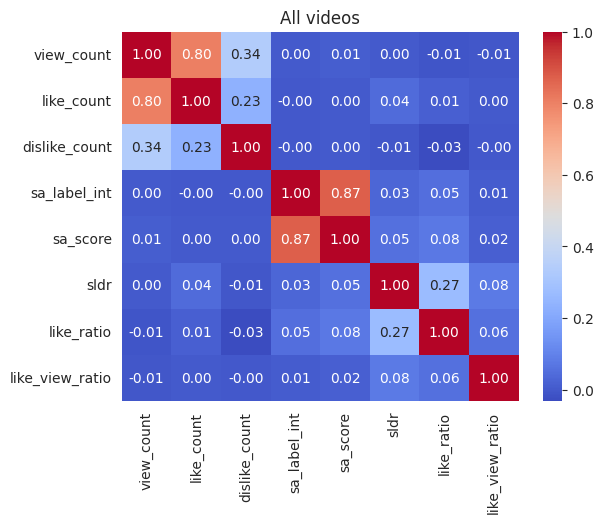

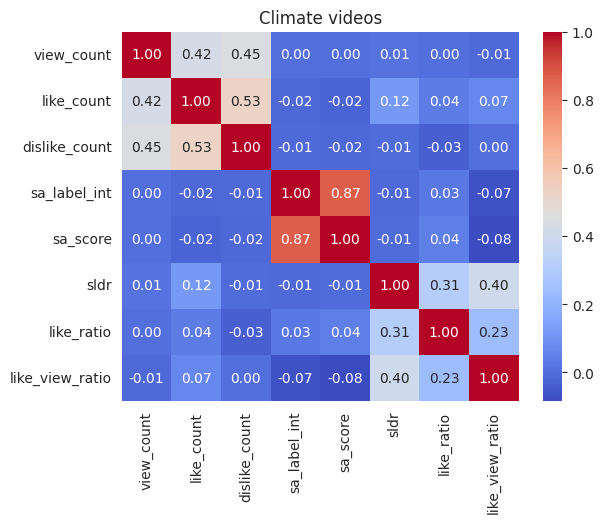

In [173]:
def sldr(like_count, dislike_count):
    if like_count == 0 and dislike_count == 0:
        return None
    if like_count > dislike_count:
        return (like_count+1)/(dislike_count+1)
    else :
        return - (dislike_count+1)/(like_count+1)
    
    
def plot_corr(data, title: str):
    data['sldr'] = data.apply(lambda row: sldr(row['like_count'], row['dislike_count']), axis=1)
    data['like_ratio'] = data['like_count'] / (data['like_count'] + data['dislike_count'])
    data['like_view_ratio'] = data['like_count'] / data['view_count']
    corr_cols = ['view_count', 'like_count', 'dislike_count', 'sa_label_int', 'sa_score', 'sldr', 'like_ratio', 'like_view_ratio']
    corr_mtx = data[corr_cols].corr()
    sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(title)
    plt.show()
    
    
plot_corr(data, 'All videos')
plot_corr(data_climate, 'Climate videos')

/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)


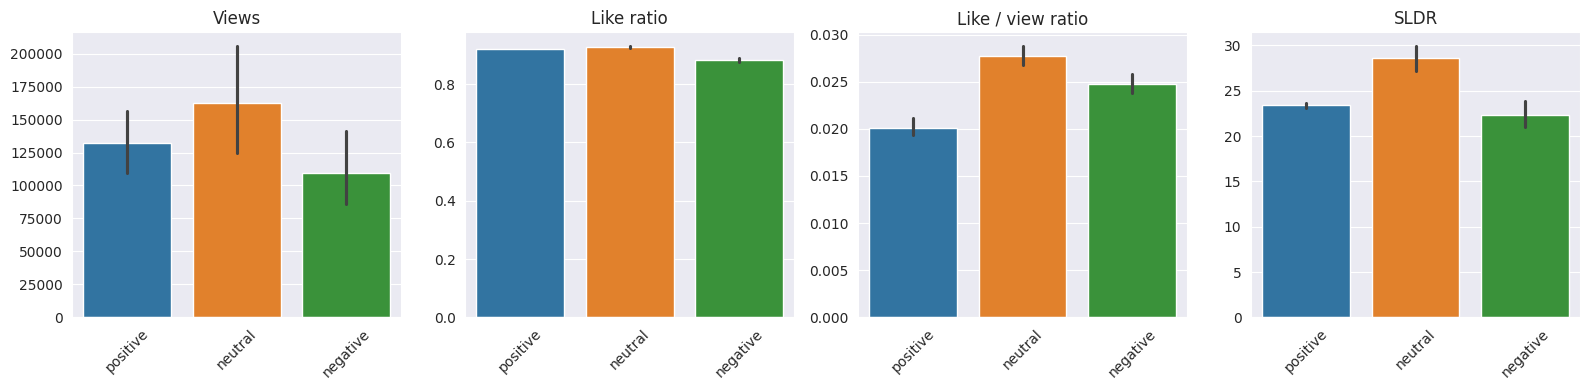

/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
/tmp/ipykernel_135373/4247354634.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)


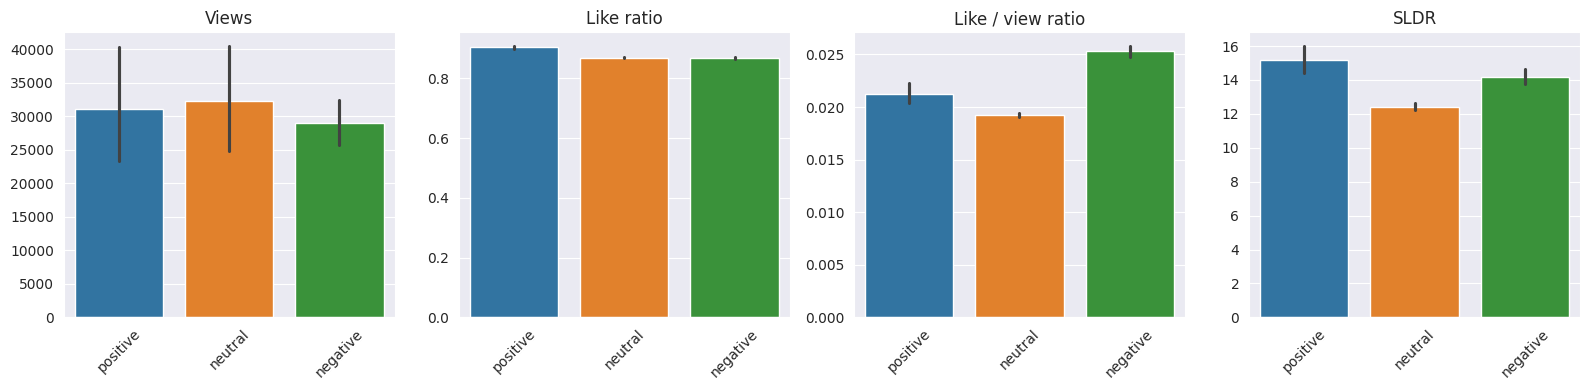

In [174]:
cols = ['view_count', 'like_ratio', 'like_view_ratio', 'sldr']
titles = ['Views', 'Like ratio', 'Like / view ratio', 'SLDR']

def plot_metrics_per_sentiment(data, title):
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    for i in range(4):
        sns.barplot(ax=ax[i], x="sa_label", y=cols[i], data=data, hue="sa_label", legend=False)
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
        ax[i].set_xticklabels(list(SentimentAnalysis.sentiment_names), rotation=45)
    
    
    plt.tight_layout()
    plt.show()
    
plot_metrics_per_sentiment(data, 'All videos')
plot_metrics_per_sentiment(data_climate, 'Climate videos')

# Does the sentiment change over time ?

/tmp/ipykernel_135373/1880729772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['upload_date'] = pd.to_datetime(data['upload_date'])
/tmp/ipykernel_135373/1880729772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['upload_year'] = data['upload_date'].dt.year


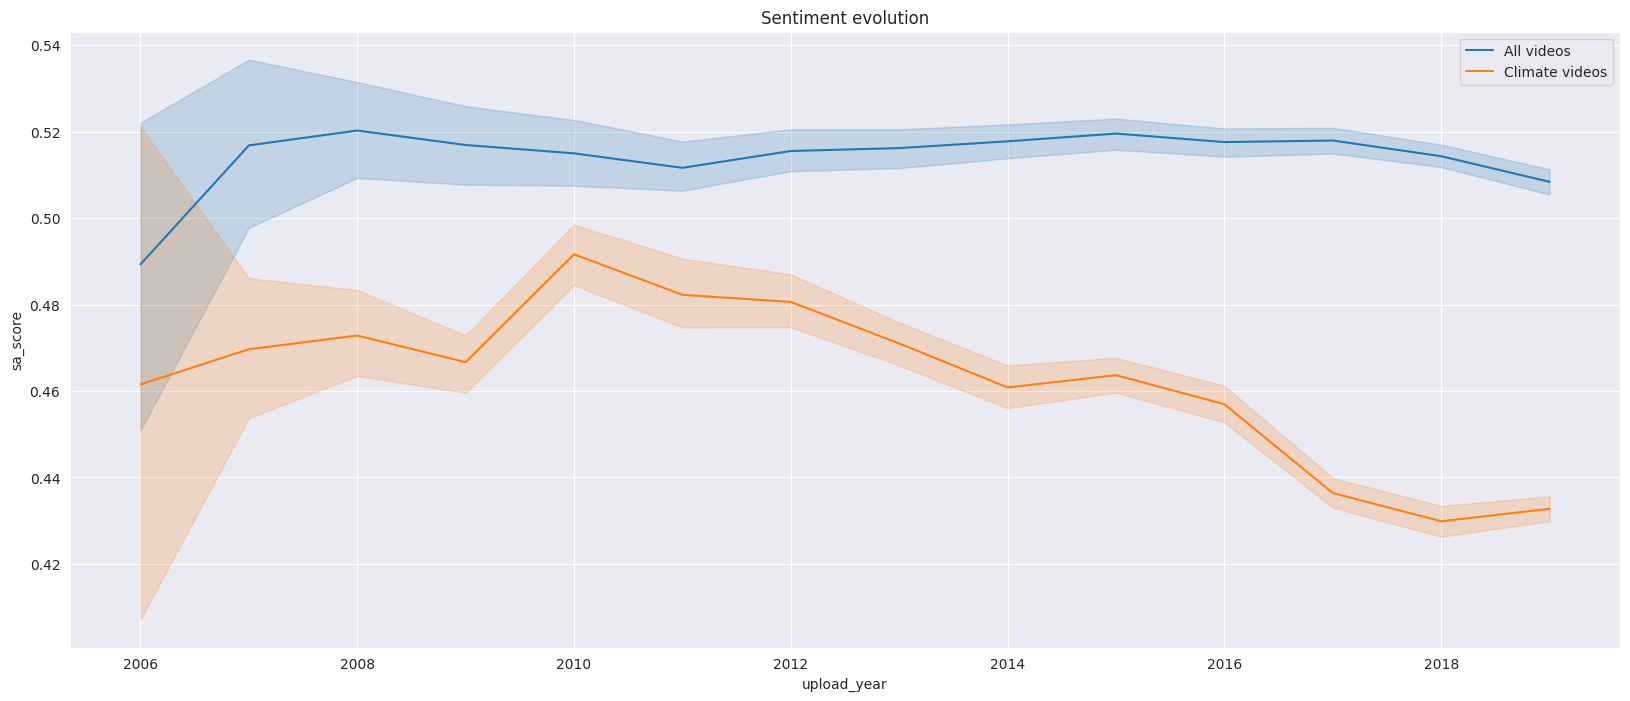

In [175]:
data['upload_date'] = pd.to_datetime(data['upload_date'])
data['upload_year'] = data['upload_date'].dt.year
data_climate['upload_date'] = pd.to_datetime(data_climate['upload_date'])
data_climate['upload_year'] = data_climate['upload_date'].dt.year

def plot_sentiment_evolution(data, label, ax):
    sns.lineplot(x="upload_year", y="sa_score", data=data, ax=ax, label=label)

fig, ax = plt.subplots(figsize=(20, 8))
plot_sentiment_evolution(data, 'All videos', ax)
plot_sentiment_evolution(data_climate, 'Climate videos', ax)
ax.set_title("Sentiment evolution")
plt.legend()
plt.show()

# Does the sentiment change according to the category ?

In [176]:
data_temp = data.copy()
data_temp['Type'] = "Normal"
data_climate_temp = data_climate.copy()
data_climate_temp['Type'] = "Climate"
all_data = pd.concat([data_temp, data_climate_temp])

/tmp/ipykernel_135373/2482680376.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


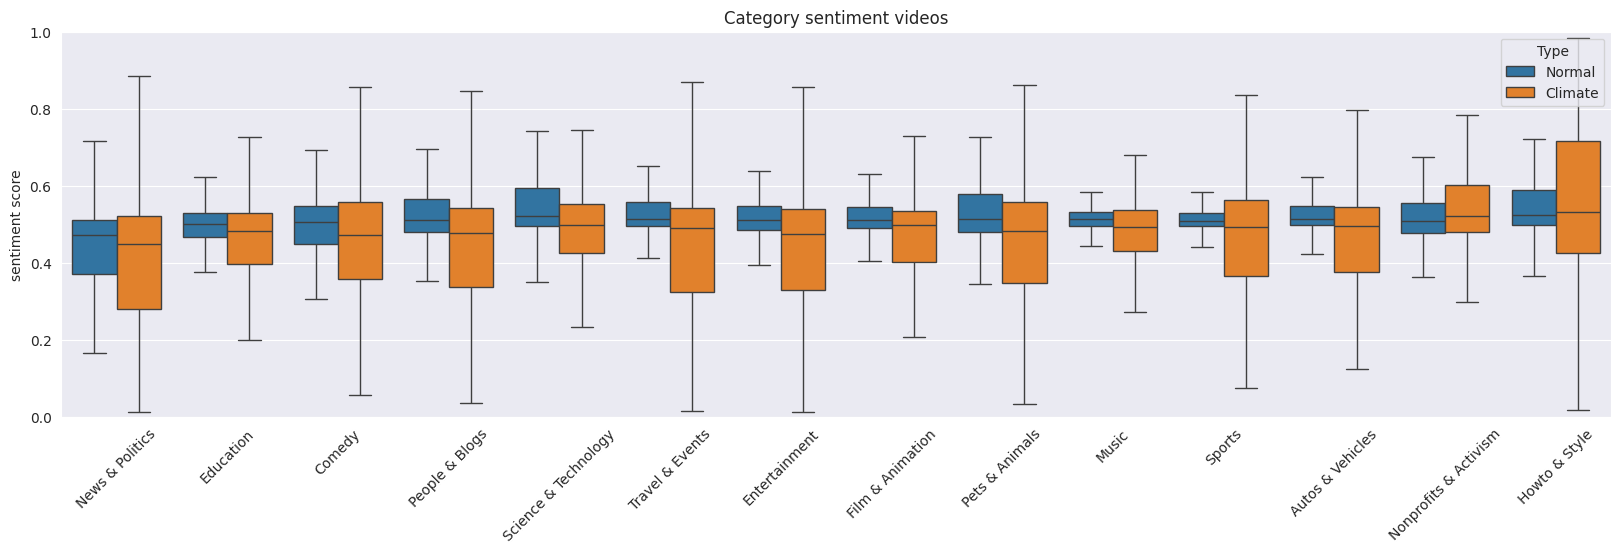

In [177]:
def plot_category_sentiment(data, title, ax):
    order = list(data.groupby("categories")["sa_score"].mean().sort_values().index)
    data_cat = data[data['categories'].isin(order)]
    sns.boxplot(x="categories", y="sa_score", data=data_cat, hue="Type", legend=True, ax=ax, order=order, showfliers=False)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("")
    ax.set_ylabel("sentiment score")
    ax.set_title(title)
    
fig, ax = plt.subplots(1, figsize=(20, 5), sharey=True)
plot_category_sentiment(all_data, 'Category sentiment videos', ax=ax)
ax.set_ylim(0.0, 1.0)
plt.show()

# Analysis negative sentiment

In [204]:
import json

neg_data = data[data['sa_label'] == 'negative'].copy()
neg_data_climate = data_climate[data_climate['sa_label'] == 'negative'].copy()
pos_data = data[data['sa_label'] == 'positive'].copy()
pos_data_climate = data_climate[data_climate['sa_label'] == 'positive'].copy()

video_counts = pd.read_json("data/nb_videos_by_cat.jsonl", lines=True)
video_counts = video_counts[video_counts['categories'].isin(neg_data['categories'].unique())]

categories
News & Politics          0.399407
Entertainment            0.171513
People & Blogs           0.145401
Education                0.053116
Comedy                   0.041246
Sports                   0.031751
Film & Animation         0.031157
Howto & Style            0.031157
Music                    0.025816
Science & Technology     0.018694
Autos & Vehicles         0.015727
Pets & Animals           0.015430
Nonprofits & Activism    0.011869
Travel & Events          0.007715
Name: proportion, dtype: float64

<Axes: title={'center': 'Ratio of negative and positive videos per category (climate)'}, xlabel='categories', ylabel='Ratio'>

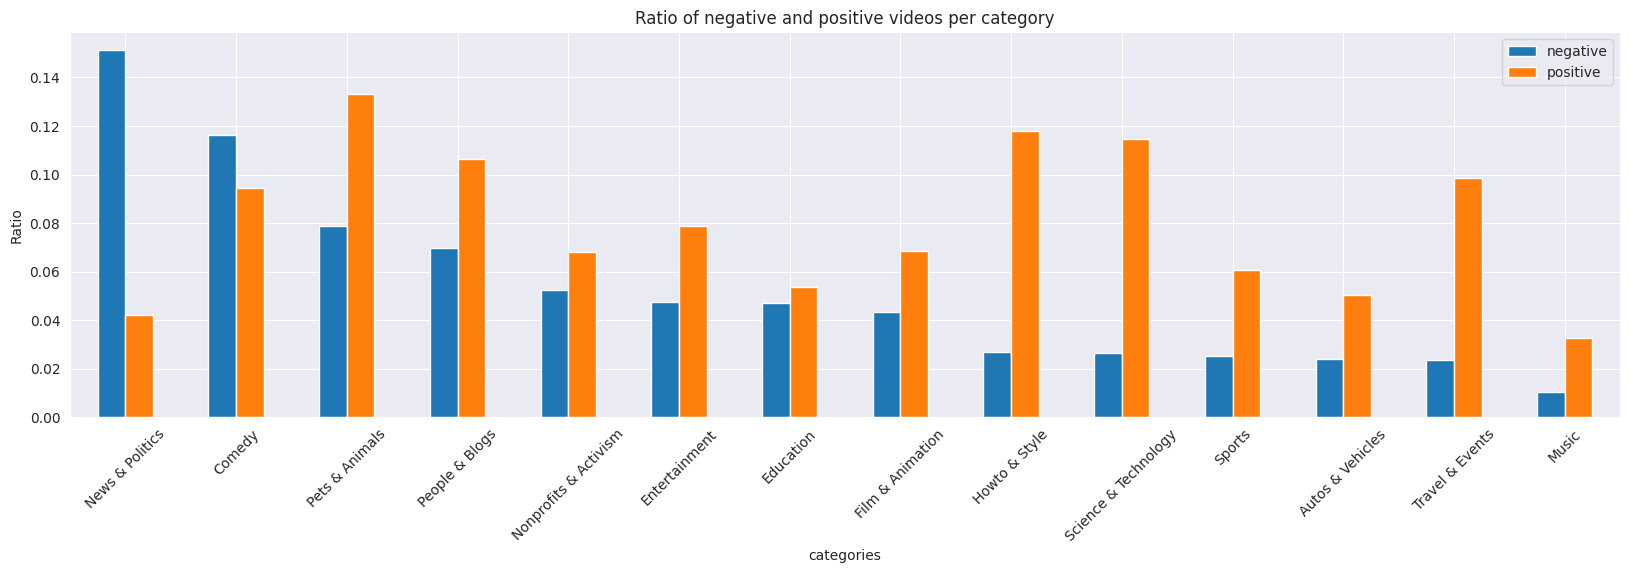

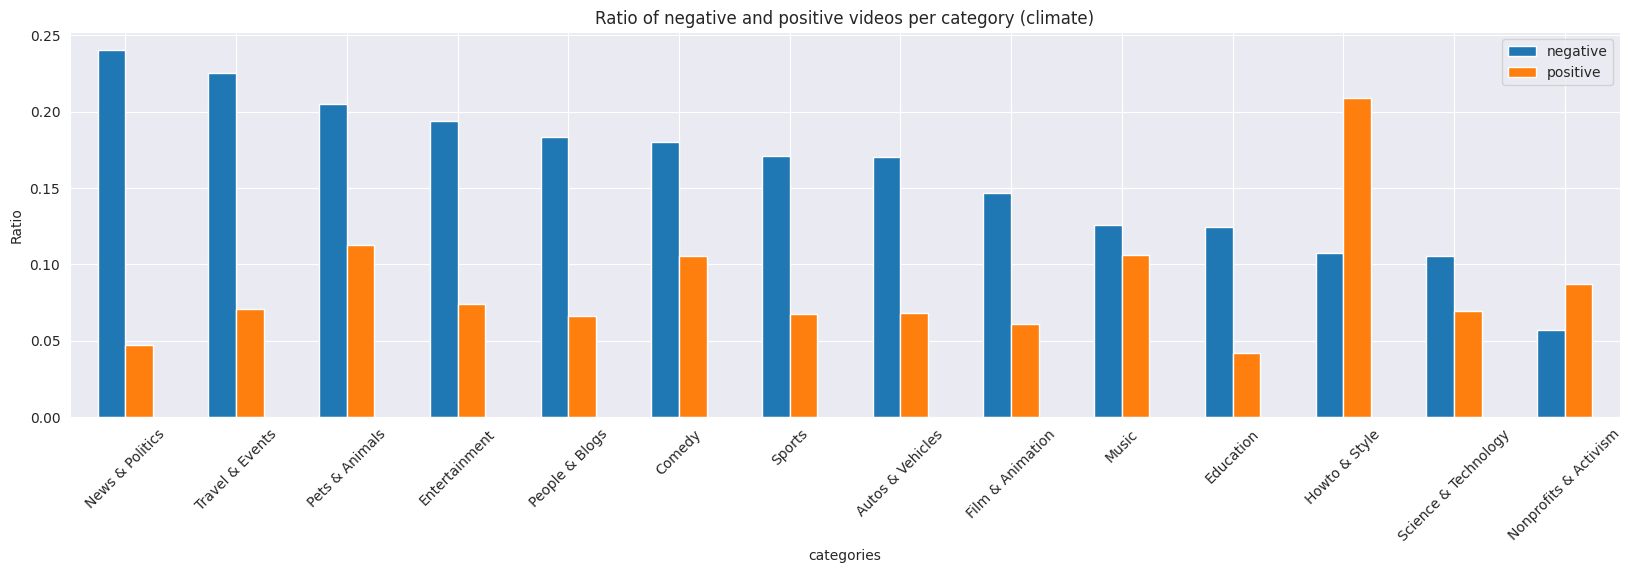

In [209]:
neg_data_ratio = neg_data['categories'].value_counts() / data['categories'].value_counts()
pos_data_ratio = pos_data['categories'].value_counts() / data['categories'].value_counts()
neg_data_climate_ratio = neg_data_climate['categories'].value_counts() / data_climate['categories'].value_counts()
pos_data_climate_ratio = pos_data_climate['categories'].value_counts() / data_climate['categories'].value_counts()

data_ratio = pd.concat([neg_data_ratio, pos_data_ratio], axis=1)
data_ratio.columns = ['negative', 'positive']
data_ratio = data_ratio.sort_values(by='negative', ascending=False)
data_ratio.plot(kind='bar', figsize=(20, 5), rot=45, ylabel="Ratio", title="Ratio of negative and positive videos per category")

data_ratio_climate = pd.concat([neg_data_climate_ratio, pos_data_climate_ratio], axis=1)
data_ratio_climate.columns = ['negative', 'positive']
data_ratio_climate = data_ratio_climate.sort_values(by='negative', ascending=False)
data_ratio_climate.plot(kind='bar', figsize=(20, 5), rot=45, ylabel="Ratio", title="Ratio of negative and positive videos per category (climate)")

TypeError: no numeric data to plot

In [180]:
neg_data = neg_data[neg_data['categories'].isin(['News & Politics', 'Entertainment', 'People & Blogs', 'Science & Technology', 'Education'])]